In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy as sp

from utils.differential import laplacian_2d
from utils.plot import plot_field

In [2]:
# Initialize functions and parameters
def f(u, v):
    return u - u**3 - v


def g(u, v):
    return u + a - b * v


D_u = 1
D_v = 1
a = 1
b = 1
epsilon = 1

/tmp/ipykernel_9570/788568959.py:3: RuntimeWarning: overflow encountered in power
  return u - u**3 - v
/tmp/ipykernel_9570/788568959.py:3: RuntimeWarning: invalid value encountered in subtract
  return u - u**3 - v
/opt/miniconda3/envs/fhn/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1286: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/opt/miniconda3/envs/fhn/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/mnt/Data/2_Area_Learn/Master Degree/2 Area_Courses/Physical Modelling of Complex System/code/code/utils/differential.py:21: RuntimeWarning: invalid value encountered in add
  return ggfx + ggfy
/opt/miniconda3/envs/fhn/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1314: RuntimeWarning: invalid value encountered in subtract
  ou

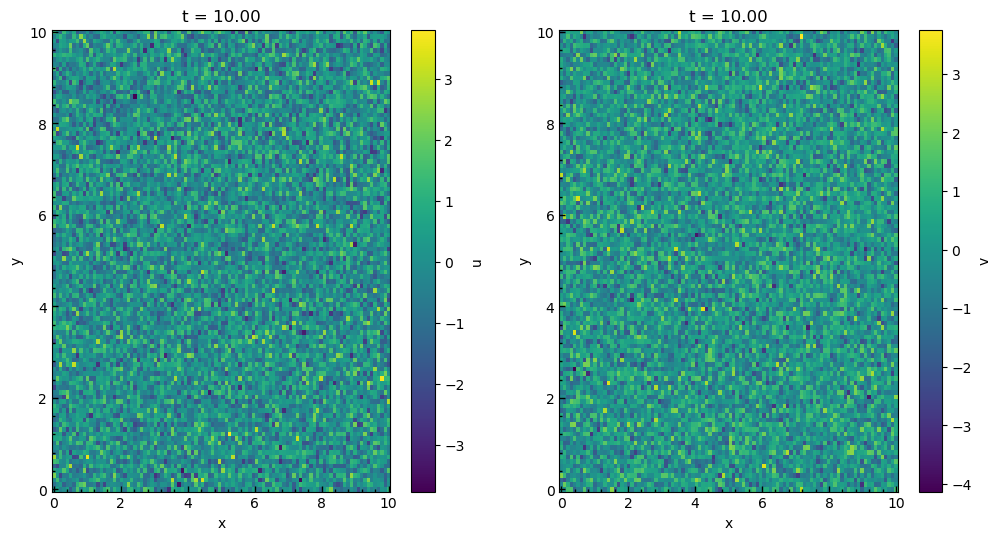

In [ ]:
# Evaluate
# Range of interest
start_time = 0
end_time = 10
n_t = 5000

start_space = 0
end_space = 10
n_space = 100

x = np.linspace(start_space, end_space, n_space)
y = np.linspace(start_space, end_space, n_space)
X, Y = np.meshgrid(x, y)

# Initial value
u = [np.random.randn(n_space, n_space)]
v = [np.random.randn(n_space, n_space)]
t = np.linspace(start_time, end_time, n_t)
dt = (end_time - start_time) / n_t

# Calculate the evolution of the field
for i in range(len(t)):
    u_t = u[i] + (f(u[i], v[i]) + D_u * laplacian_2d(u[i])) * dt
    v_t = v[i] + (epsilon * g(u[i], v[i]) + D_v * laplacian_2d(v[i])) * dt

    u.append(u_t)
    v.append(v_t)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
u0 = plot_field(axes[0], X, Y, u[0], t[0], "u")
y0 = plot_field(axes[1], X, Y, v[0], t[0], "v")


def update(frame):
    u0.set_array(u[frame].flatten())
    y0.set_array(v[frame].flatten())

    axes[0].set_title(f"t = {t[frame-1]:.2f}")
    axes[1].set_title(f"t = {t[frame-1]:.2f}")

    return u0, y0


# Create the animation
ani = FuncAnimation(fig, update, frames=len(u))
ani.save("../data/test_animation.mp4", writer="ffmpeg", fps=30)